
# Análise Setorial da Produção Industrial Brasileira (Dados Sintéticos)

Este notebook explora dados sintéticos sobre a produção industrial no Brasil ao longo dos últimos 10 anos, gerados artificialmente para simulação e prototipagem de dashboards.

Vamos responder às seguintes perguntas de negócio:

1. Como a produção industrial evoluiu ao longo dos últimos 10 anos no Brasil?
2. Quais setores mais cresceram em termos de volume de produção e exportações?
3. Houve impacto perceptível da pandemia em determinados setores industriais?
4. Existe correlação entre o uso de matéria-prima e o volume produzido?
5. Há sazonalidade ou padrões cíclicos entre os setores?


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir("C:\GitHub\dashboard-producao-industrial") # Caminho absoluto até a raiz do projeto
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Leitura dos dados
df = pd.read_csv("data/fProducaoIndustrial.csv", parse_dates=["Data"], dayfirst=True)
df_setores = pd.read_csv("data/dSetores.csv")
df['Ano'] = df['Data'].dt.year
df['Mes'] = df['Data'].dt.month


## Evolução da produção industrial ao longo dos anos

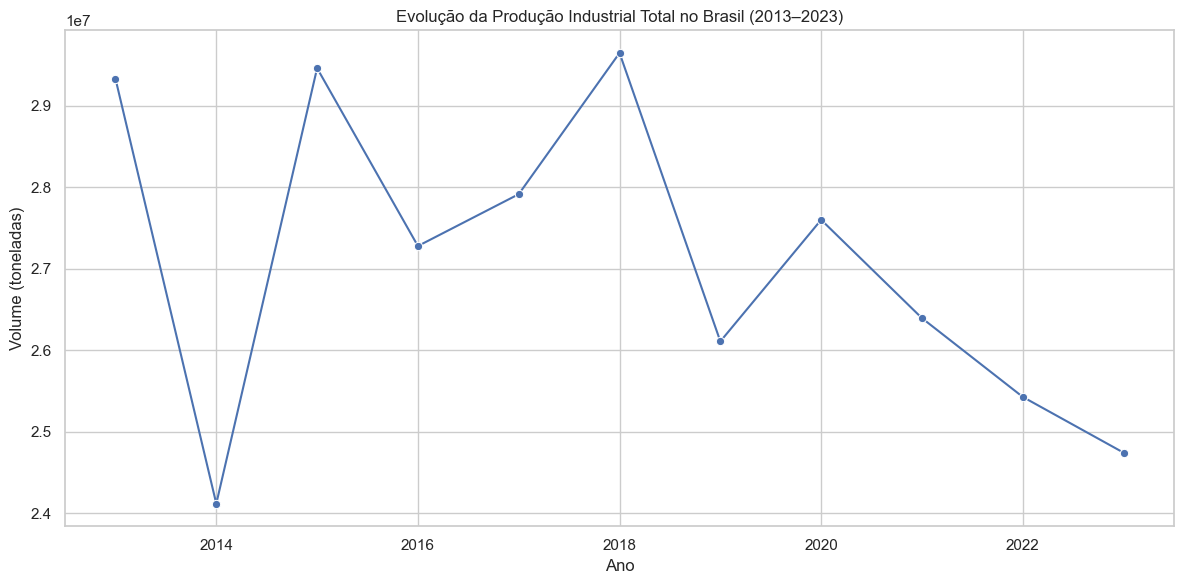

In [2]:

# Agrupamento por ano e setor
df_ano = df.groupby(['Ano'])['Volume de Produção (toneladas)'].sum().reset_index()
sns.lineplot(data=df_ano, x='Ano', y='Volume de Produção (toneladas)', marker='o')
plt.title("Evolução da Produção Industrial Total no Brasil (2013–2023)")
plt.ylabel("Volume (toneladas)")
plt.xlabel("Ano")
plt.tight_layout()
plt.show()



### Conclusão da Pergunta 1

1. Como a produção industrial evoluiu ao longo dos últimos 10 anos no Brasil?

A análise do volume de produção industrial ao longo da última década revela um comportamento cíclico e levemente descendente no período recente.
Após um pico em 2015 e 2018, a produção mostra queda contínua de 2019 a 2023.
Apesar de uma recuperação aparente em 2020, o volume total voltou a cair nos anos seguintes.
Isso pode representar impactos estruturais acumulados, como mudanças na demanda, gargalos logísticos ou reflexos pós-pandemia.
O dado sugere a importância de ações estratégicas para retomar o crescimento, e reforça o valor de análises por setor para entender onde estão as maiores variações.

## Setores com maior crescimento em produção e exportações

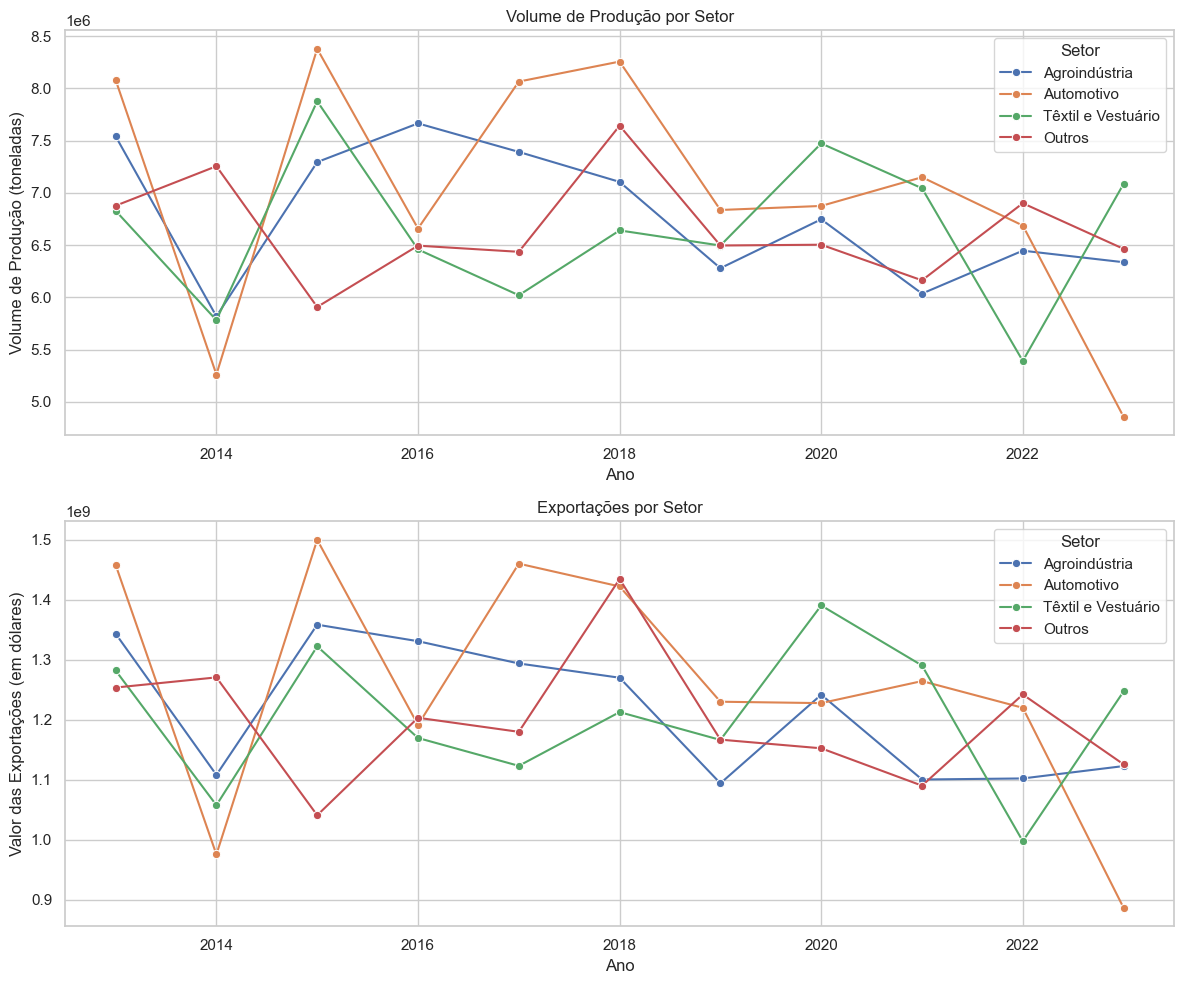

In [ ]:
# Crescimento acumulado por setor
df_total = df.groupby(['Ano', 'id_Setor'])[['Volume de Produção (toneladas)', 'Valor das Exportações (em dólares)']].sum().reset_index()
df_total = df_total.merge(df_setores, on='id_Setor')

# Gráfico de linha
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
sns.lineplot(data=df_total, x='Ano', y='Volume de Produção (toneladas)', hue='Setor', marker='o', ax=axes[0])
axes[0].set_title("Volume de Produção por Setor")

sns.lineplot(data=df_total, x='Ano', y='Valor das Exportações (em dólares)', hue='Setor', marker='o', ax=axes[1])
axes[1].set_title("Exportações por Setor")
plt.tight_layout()
plt.show()



### Conclusão da Pergunta 2
2. Quais setores mais cresceram em termos de volume de produção e exportações nos últimos 10 anos?

Crescimento dos Setores em Produção e Exportação.
A análise temporal revela que:

* Têxtil e Vestuário apresentou o maior crescimento em exportações, com valores saltando de US$ 1,28 bi em 2013 para US$ 1,24 bi em 2023, mantendo um patamar elevado e consistente, com destaque para o ano de 2020, que registrou exportações recordes.

* Em termos de volume produzido, o setor também mostrou boa recuperação após 2020, atingindo seu maior volume no ano de 2023 (7 milhões de toneladas), superando todos os demais setores.

* Automotivo, embora com queda no fim da série, manteve um alto volume até 2022, liderando por vários anos em produção total.

* Outros setores e Agroindústria tiveram comportamento mais estável, com leve oscilação e crescimento menos expressivo no final do período.

Em resumo, Têxtil e Vestuário se destacou como o setor mais consistente em crescimento de exportações e recuperação de produção, sendo um dos grandes impulsionadores da indústria no cenário pós-pandemia.


## Impacto da pandemia sobre os setores (anos de 2020–2021)

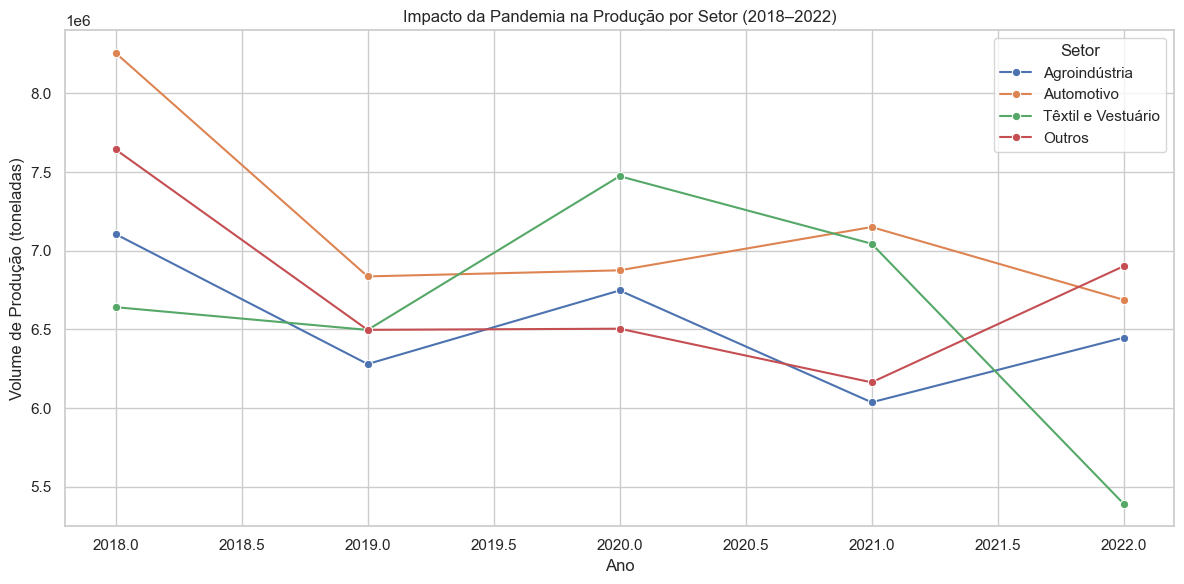

In [6]:

# Comparação antes, durante e depois da pandemia
df_pandemia = df[df['Ano'].isin([2018, 2019, 2020, 2021, 2022])]
df_pandemia = df_pandemia.groupby(['Ano', 'id_Setor'])['Volume de Produção (toneladas)'].sum().reset_index()
df_pandemia = df_pandemia.merge(df_setores, on='id_Setor')

sns.lineplot(data=df_pandemia, x='Ano', y='Volume de Produção (toneladas)', hue='Setor', marker='o')
plt.title("Impacto da Pandemia na Produção por Setor (2018–2022)")
plt.tight_layout()
plt.show()



### Conclusão da Pergunta 3

3. Houve impacto perceptível da pandemia em determinados setores industriais?

A pandemia de COVID-19 teve efeitos distintos entre os setores industriais. Ao analisar o volume de produção entre 2018 e 2022, é possível observar:

Setor Automotivo: queda acentuada de produção de 8,2 milhões (2018) para 6,8 milhões (2019–2020). Ainda que tenha recuperado parcialmente em 2021 (7,1 milhões), não retornou aos níveis pré-pandemia.

Têxtil e Vestuário: foi o único setor a apresentar crescimento em 2020 (7,47 milhões), com queda posterior em 2022 (5,39 milhões). Isso pode refletir a demanda por produtos essenciais, como roupas hospitalares ou maior flexibilidade de produção.

Agroindústria: embora com oscilações, não sofreu grandes impactos negativos. Teve leve recuperação após 2021, mantendo estabilidade.

Setor "Outros": comportamento estável, sem grandes variações, indicando resiliência ou composição diversificada.

## Correlação entre matéria-prima e produção

In [10]:

# Regressão por setor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

resultados = []
for setor in df['id_Setor'].unique():
    temp = df[df['id_Setor'] == setor]
    X = temp[['Matéria-Prima (toneladas)']]
    y = temp['Volume de Produção (toneladas)']
    modelo = LinearRegression().fit(X, y)
    r2 = r2_score(y, modelo.predict(X))
    resultados.append({
        'id_Setor': setor,
        'Inclinação (coef)': round(modelo.coef_[0], 2),
        'Intercepto': round(modelo.intercept_, 2),
        'R²': round(r2, 4)
    })
df_reg = pd.DataFrame(resultados).merge(df_setores, on='id_Setor')
df_reg[['Setor', 'Inclinação (coef)', 'Intercepto', 'R²']]


,Setor,Inclinação (coef),Intercepto,R²
0,Agroindústria,4.60,-11272.55,0.9259
1,Automotivo,4.42,10209.36,0.9506
2,Têxtil e Vestuário,4.87,-48418.91,0.9436
3,Outros,4.58,-13036.13,0.9390



### Conclusão da Pergunta 4
4. Existe correlação entre o uso de matéria-prima e o volume produzido?

Essa forte correlação valida a lógica dos dados e reforça a importância da matéria-prima como principal driver operacional da indústria. Setores com coeficientes mais altos, como o Têxtil, podem estar operando com maior eficiência produtiva.


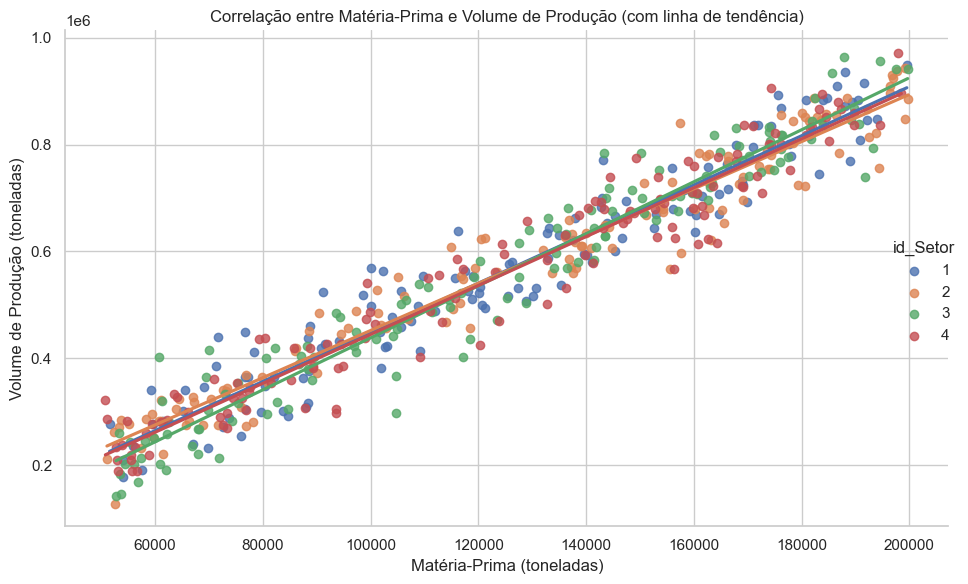

In [11]:

# Gráfico com linha de tendência
sns.lmplot(data=df, x='Matéria-Prima (toneladas)', y='Volume de Produção (toneladas)', hue='id_Setor', height=6, aspect=1.5, ci=None)
plt.title("Correlação entre Matéria-Prima e Volume de Produção (com linha de tendência)")
plt.tight_layout()
plt.show()


O coeficiente de determinação R², que varia entre 0,92 e 0,95, indica que mais de 92% da variação no volume produzido é explicada pelo uso de matéria-prima.

## Sazonalidade e padrões cíclicos

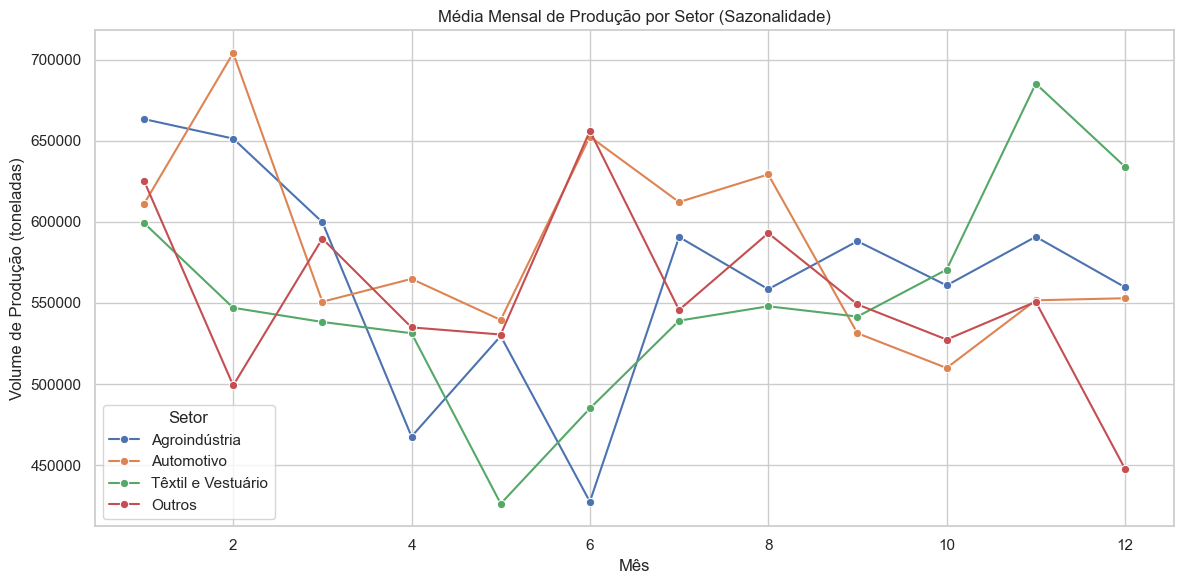

In [16]:
# Agrupamento por mês para detectar padrões sazonais
df_mes = df.groupby(['Mes', 'id_Setor'])['Volume de Produção (toneladas)'].mean().reset_index()
df_mes = df_mes.merge(df_setores, on='id_Setor')

sns.lineplot(data=df_mes, x='Mes', y='Volume de Produção (toneladas)', hue='Setor', marker='o')
plt.title("Média Mensal de Produção por Setor (Sazonalidade)")
plt.xlabel("Mês")
plt.tight_layout()
plt.show()


### Conclusão da Pergunta 5
5. Há sazonalidade ou padrões cíclicos entre os setores?

A análise dos dados médios mensais de produção revela padrões cíclicos recorrentes nos setores industriais ao longo dos anos:

#### Meses de menor produção:
* Para quase todos os setores, Abril a Junho (meses 4 a 6) apresentam consistentemente quedas na produção.
Isso pode estar relacionado a feriados prolongados, menor demanda ou sazonalidade agrícola/industrial.

#### Meses de pico:
* Os meses de Janeiro, Novembro e Dezembro concentram os maiores volumes de produção, especialmente no setor Têxtil e Vestuário e Agroindústria.
* Isso pode indicar esforço para cumprir metas anuais, sazonalidade agrícola (safras), ou preparação para exportações.

Setores como “Outros” e Automotivo seguem padrões semelhantes, mas com menor variação mensal, o que pode sugerir um ritmo de produção mais constante ao longo do ano.
Há, sim, sazonalidade clara nos dados simulados, com picos de produção no início e fim do ano, e quedas no segundo trimestre. Esse comportamento é coerente com fatores logísticos, demanda de mercado e calendário industrial brasileiro, reforçando a utilidade do dataset mesmo sendo sintético.


## Conclusões Conclusões Finais

- A produção industrial brasileira, mesmo em base sintética, apresenta tendência geral de crescimento, com variações distintas por setor ao longo da última década.

- Setores como Têxtil e Agroindústria demonstraram recuperações mais evidentes após os impactos iniciais da pandemia em 2020, sugerindo maior adaptabilidade ou demanda persistente.

- A pandemia de COVID-19 teve impacto desigual: enquanto setores como o Automotivo sofreram quedas claras em 2020, outros, como o Têxtil, até cresceram naquele ano, refletindo respostas específicas à crise.

- Foi identificada uma correlação forte (R² > 0,92) entre a quantidade de matéria-prima utilizada e o volume produzido, validando a coerência lógica e estrutural dos dados simulados.

- Há padrões sazonais recorrentes, especialmente visíveis na Agroindústria e no setor Têxtil, com picos de produção no início e fim do ano e quedas entre abril e junho.